In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.datasets import mnist
from keras.utils import np_utils
from keras.callbacks import TensorBoard
import tensorflow as tf

#setting batch and epochs
from sklearn.model_selection import train_test_split

batch_size = 128
nb_classes = 10
nb_epoch = 5

In [0]:
#loading the dataset(mnist)
dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/lab2/heart.csv").values
 #print(dataset)
import numpy as np
X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:13], dataset[:,13],
                                                    test_size=0.25, random_state=87)
#(X_train, y_train), (X_test, y_test) = mnist.load_data()
# X_train = X_train.reshape(100, 784)
# X_test = X_test.reshape(5000, 784)
# print(X_train)
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
Y_Train = np_utils.to_categorical(Y_train, nb_classes)
Y_Test = np_utils.to_categorical(Y_test, nb_classes)

# X_train = X_train.astype('float32') / 255.
# X_test = X_test.astype('float32') / 255.
# X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
# X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))


In [10]:
#performing Logistic_regression
model = Sequential()
model.add(Dense(output_dim=10, input_shape=(13,), init='normal', activation='softmax'))
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_shape=(13,), activation="softmax", units=10, kernel_initializer="normal")`
  


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                140       
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________


In [11]:
#tensorboard graph genertion
tensorboard = TensorBoard(log_dir="logslo1/{}",histogram_freq=0, write_graph=True, write_images=True)
history=model.fit(X_train, Y_Train, nb_epoch=nb_epoch, batch_size=batch_size,callbacks=[tensorboard])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/5
227/227 [==============================] - 0s 1ms/step - loss: 2.3182 - accuracy: 0.0000e+00
Epoch 2/5
227/227 [==============================] - 0s 28us/step - loss: 2.2975 - accuracy: 0.0000e+00
Epoch 3/5
227/227 [==============================] - 0s 40us/step - loss: 2.2771 - accuracy: 0.0000e+00
Epoch 4/5
227/227 [==============================] - 0s 23us/step - loss: 2.2568 - accuracy: 0.0000e+00
Epoch 5/5
227/227 [==============================] - 0s 18us/step - loss: 2.2368 - accuracy: 0.0132


In [12]:
#predicting the accuracy of the model
score = model.evaluate(X_test, Y_Test, verbose=1)
print('Loss: %.2f, Accuracy: %.2f' % (score[0], score[1]))

76/76 [==============================] - 0s 221us/step
Loss: 2.22, Accuracy: 0.16


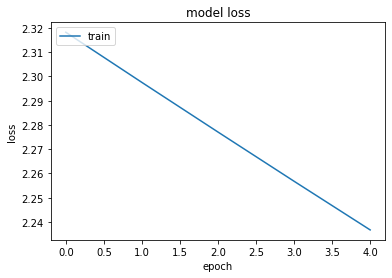

In [13]:
#plotting the loss
plt.plot(history.history['loss'])
# plt.plot(history.history['test_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()